In [1]:
import pandas as pd
import matplotlib
import numpy as np
# from numpy.random import random

#import d3py
#import pyodbc

#import scipy.stats as stats
#from collections import Counter
import psycopg2

#from bokeh.plotting import figure, output_file, show, output_notebook
#from bokeh.charts import Bar
#import matplotlib.pyplot as plt
%matplotlib inline 
#output_notebook()

import sqlite3
import math
import random

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from datetime import datetime, timedelta
#import string
#import re
from configparser import ConfigParser
from sqlalchemy import create_engine
#import seaborn as sns; sns.set()

import datetime
import pytz

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats as scs
import statsmodels.api as sm
%matplotlib inline



#now_aware = pytz.utc.localize(unaware)
#assert aware == now_aware

pd.options.display.float_format = '{:20,.2f}'.format

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   :  15}


#plt.rc('font', **font)
pd.set_option('display.max_columns', 500)
pd.options.mode.chained_assignment = None  

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

/Users/sewald101/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.cross_validation import train_test_split
import math

from random import random
import statsmodels.api as smapi
from statsmodels.formula.api import ols
import statsmodels.graphics as smgraphics
import time

/Users/sewald101/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df_full = pd.read_csv("../data/Zip_demographic_w_sales_2.csv")

In [4]:
df_label_columns_list = ['Avg Monthly Wholesales in period'
                    ,'Avg Monthly Retail Sales in Period 2'
                    , 'Per Capita Retail Sales'
                   ]

categorical_variables_list = ['First city'
                             , 'First Region']

df = df_full.dropna(axis=0, how='any')
df.reset_index(inplace=True)
df.drop('index', inplace=True, axis=1)

In [5]:
df['Avg Monthly Retail Sales in Period 2'] = df['Avg Monthly Retail Sales in Period 2'].apply(lambda x: int(round(float(x[1:]))) if type(x) == str else np.nan)
df['Avg Monthly Wholesales in period']     = df['Avg Monthly Wholesales in period'].apply(lambda     x: int(round(float(x[1:]))) if type(x) == str else np.nan)
df['Per Capita Retail Sales']              = df['Per Capita Retail Sales'].apply(lambda              x: int(round(float(x[1:]))) if type(x) == str else np.nan)
df['Total Wholesale Price']                = df['Total Wholesale Price'].apply(lambda                x: int(round(float(x[1:]))) if type(x) == str else np.nan)
df['Total Sales']                          = df['Total Sales'].apply(lambda                          x: int(round(float(x[1:]))) if type(x) == str else np.nan)
df['Per Capita Retail Sales']              = df['Total Sales'] / df['Population'] 

In [6]:
cities_dummy = pd.get_dummies(df['First city'])

In [7]:
county_dummy = pd.get_dummies(df['First county'])
region_dummy = pd.get_dummies(df['First Region'])

In [8]:
df[list(county_dummy.columns)] = county_dummy[list(county_dummy.columns)]

In [9]:
df[list(region_dummy.columns)] = region_dummy[list(region_dummy.columns)]

In [11]:
df.drop(['First city', 'First county', 'First Region'], inplace=True, axis=1)

In [12]:
df = df[df['Per Capita Retail Sales'] <= 1000]

In [13]:
df_labels = df[df_label_columns_list]

# Set up Labels

In [14]:
#df.drop(['First city', 'First Region'], axis =1, inplace=True)

In [15]:
df[['Zip']] = df[['Zip']].apply(pd.to_numeric)

In [16]:
df['Zip_str'] = df.Zip.apply(lambda x: str(x)[:-2])

In [17]:
df.drop(['Zip', 'Zip_str'], inplace=True, axis=1)

In [18]:
df.drop(['Avg Monthly Wholesales in period'
                    ,'Avg Monthly Retail Sales in Period 2'
                    , 'Per Capita Retail Sales'], inplace=True, axis=1)

In [19]:
def pop_out_label(label_col= "Balance"):
    # Separate the Balance from all the other predictors
    X = balance.copy()
    y = X.pop(label_col)
    return X, y

def summary_model(X, y, label='scatter'):
    model = sm.OLS(y, X).fit()
    summary = model.summary()
    return model, summary

def plot_model(X, y, label='Residual Plot'):
    model = sm.OLS(y, X).fit()
    student_resids = model.outlier_test()['student_resid']
    y_hats = model.predict(X)

    plt.scatter(y_hats, student_resids, alpha = .35, label=label)
    plt.legend()
    plt.show()
    
    
def get_dummies():
    # Get the Dummy variables
    ethnicity_dummy = pd.get_dummies(balance['Ethnicity'])
    # Only need two of the three values
    balance[ ['Asian', 'Caucasian'] ] = ethnicity_dummy[ ['Asian', 'Caucasian'] ]
    # Remove the Ethnicity column
    del balance['Ethnicity']

In [20]:
X1 = df.astype(float)
y1 = df_labels["Per Capita Retail Sales"].astype(float)

In [21]:
model, model_sum,  = summary_model(X= X1.astype(float)
                               , y= y1, label= 'scatter')

In [22]:
outliers_test = model.outlier_test()

/Users/sewald101/anaconda2/lib/python2.7/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/Users/sewald101/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/sewald101/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/sewald101/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/sewald101/anaconda2/lib/python2.7/site-packages/statsmodels/stats/multitest.py:147: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
/Users/sewald101/anaconda2/lib/python2.7/site-packages/stat

In [24]:
outliers_test.iloc[2]

student_resid                   0.88
unadj_p                         0.38
bonf(p)                         1.00
Name: 2, dtype: float64

In [25]:
outliers = ((x[i], y[i]) for i, t in enumerate(outliers_test.iloc[:2]) if t < 0.5)

In [26]:
model_sum

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Per Capita Retail Sales   R-squared:                       0.925
Model:                                 OLS   Adj. R-squared:                  0.849
Method:                      Least Squares   F-statistic:                     12.06
Date:                     Tue, 20 Mar 2018   Prob (F-statistic):           2.22e-22
Time:                             13:34:13   Log-Likelihood:                -824.88
No. Observations:                      151   AIC:                             1804.
Df Residuals:                           74   BIC:                             2036.
Df Model:                               76                                         
Covariance Type:                 nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Population                0.0005      0.014      0.038      0.970      -0.028       0.029
Total Sales            2.917e-05   1.21e-05      2.417      0.018    5.13e-06    5.32e-05
MedianAge              -119.6296     79.985     -1.496      0.139    -279.004      39.745
HouseHolder15to24        -0.0456      0.577     -0.079      0.937      -1.195       1.103
HouseHolder25to34        -0.0629      0.568     -0.111      0.912      -1.195       1.069
HouseHolder35to44        -0.0285      0.573     -0.050      0.960      -1.169       1.112
HouseHolder45to54        -0.1502      0.567     -0.265      0.792      -1.280       0.980
HouseHolder55to59        -0.1560      0.600     -0.260      0.795      -1.351       1.039
HouseHolder60to64        -0.9146      0.748     -1.223      0.225      -2.405       0.576
HouseHolder65to74        -0.9724      0.738     -1.318      0.192      -2.442       0.498
HouseHolder75to84         0.2206      0.161      1.370      0.175      -0.100       0.541
Households               -0.4468      1.107     -0.404      0.688      -2.653       1.759
HouseHolder85over         0.2368      0.328      0.722      0.473      -0.417       0.891
Households2Person         0.5912      1.229      0.481      0.632      -1.857       3.040
Households3Person         0.5061      1.213      0.417      0.678      -1.911       2.923
Households4Person         0.6089      1.233      0.494      0.623      -1.848       3.066
Households5Person         0.6787      1.183      0.574      0.568      -1.679       3.036
Households6Person         0.2944      1.308      0.225      0.822      -2.311       2.900
Households7PlusPerson     0.6910      1.212      0.570      0.570      -1.725       3.107
HouseholdsWith60Plus      0.8088      0.373      2.167      0.033       0.065       1.552
HouseholdsWith75Plus     -1.0073      0.740     -1.361      0.177      -2.482       0.467
HusbandWifeHouseholds    -0.0868      0.289     -0.300      0.765      -0.663       0.489
MedianAgeFemale          76.7511     39.464      1.945      0.056      -1.882     155.384
MedianAgeMale            47.4205     43.488      1.090      0.279     -39.231     134.072
NonFamilyHouseholds      -0.0651      0.277     -0.235      0.815      -0.618       0.488
PopulationAmerindian   -488.3949   1356.741     -0.360      0.720   -3191.761    2214.971
PopulationFemale         -0.0036      0.028     -0.128      0.898      -0.059       0.052
PopulationMale            0.0043      0.023      0.191      0.849      -0.041       0.049
PopulationRaceAsian    -830.6437   1239.489     -0.670      0.505   -3300.380    1639.093
PopulationRaceBlack    -548.8975   1334.558     -0.411      0.682   -3208.062    2110.267
PopulationRaceLatino   -700.8101   1256.628     -0.558    

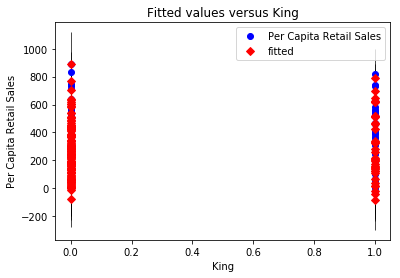

In [27]:
figure = smgraphics.regressionplots.plot_fit(model, 'King')


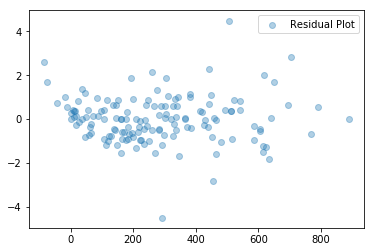

In [28]:
plot_model(X= df.astype(float), y = df_labels['Per Capita Retail Sales'].astype(float))

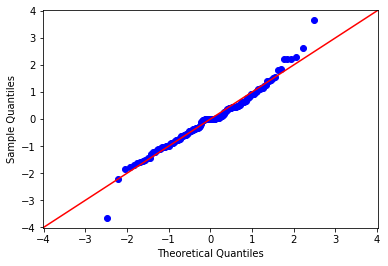

In [29]:
sm.graphics.qqplot(model.resid, line='45', fit=True)
plt.show()


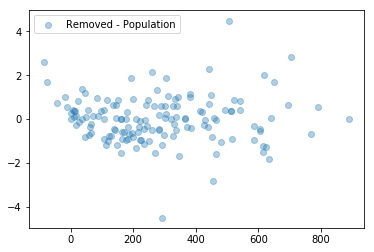

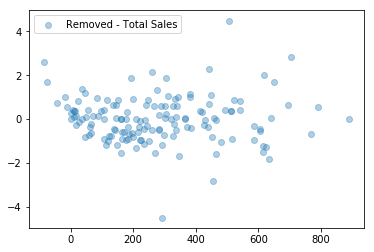

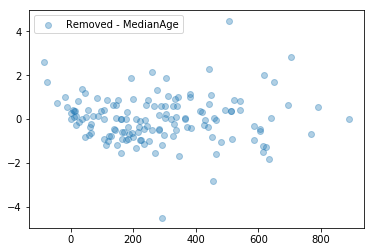

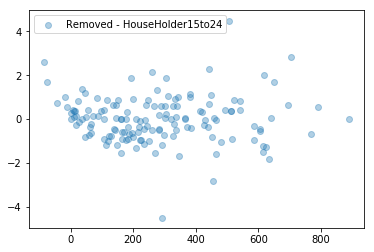

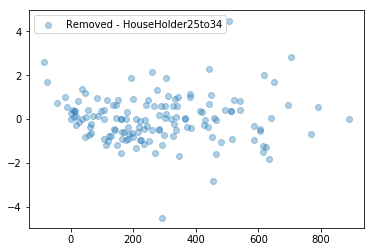

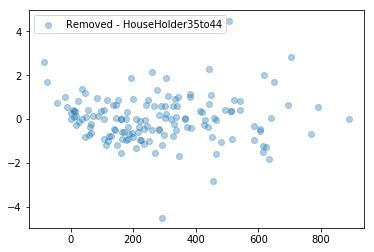

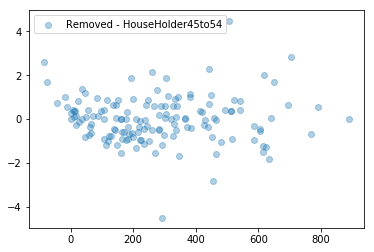

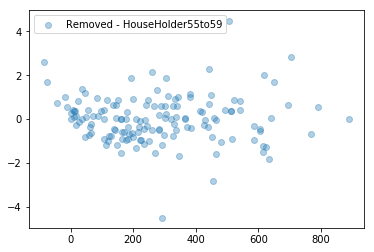

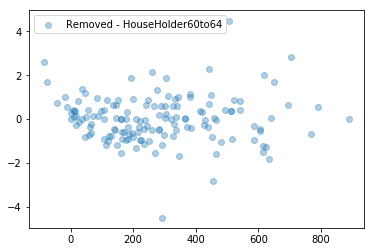

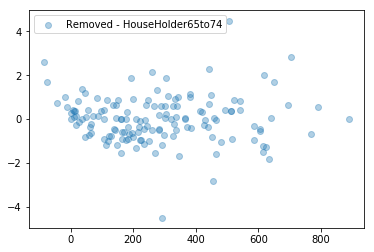

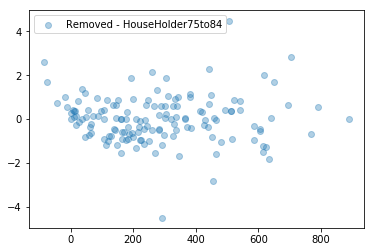

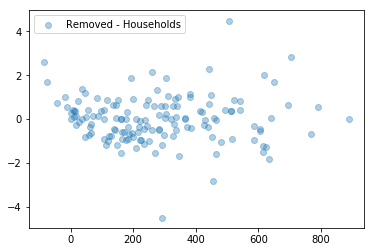

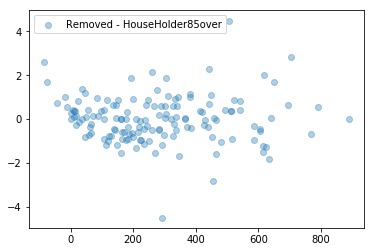

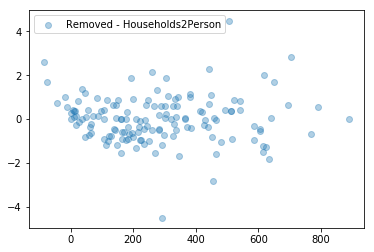

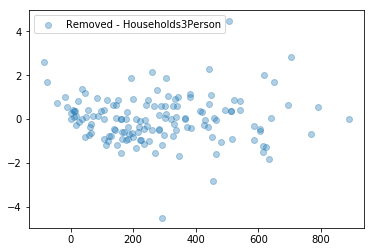

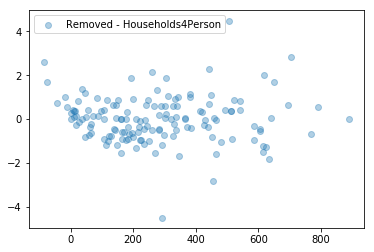

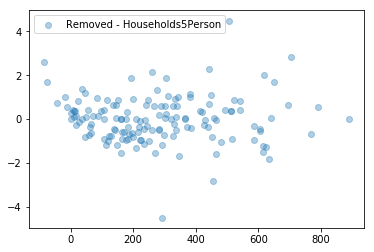

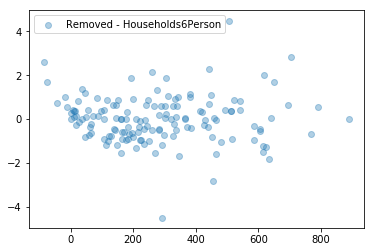

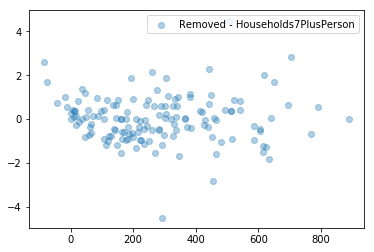

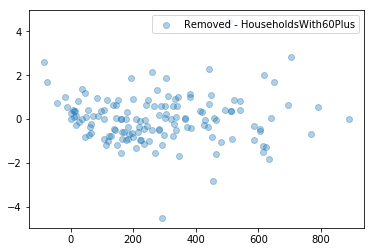

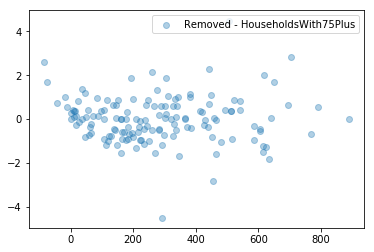

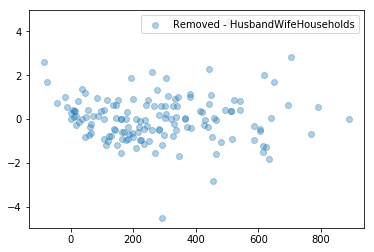

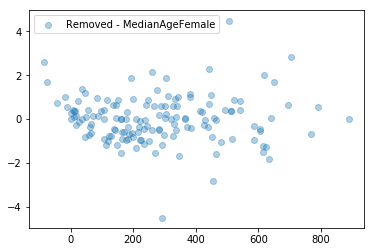

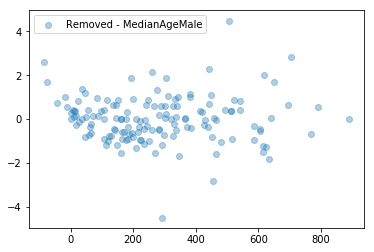

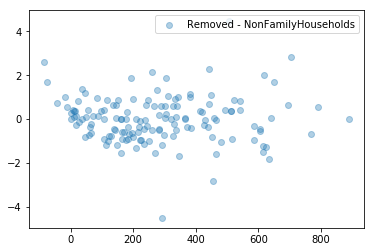

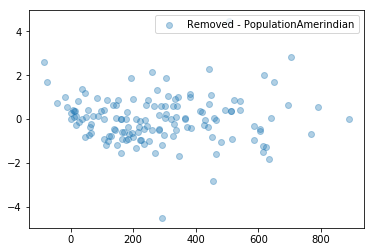

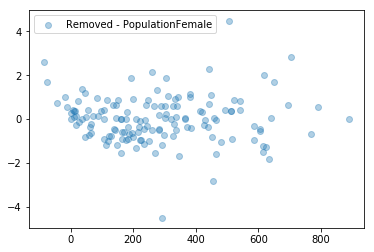

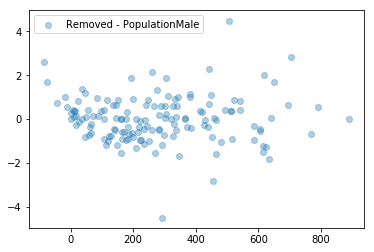

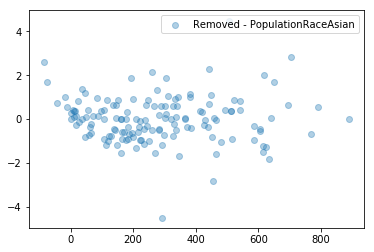

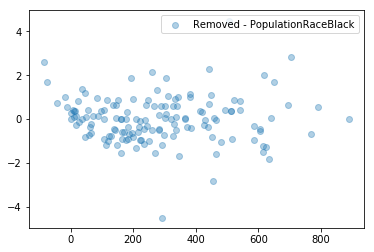

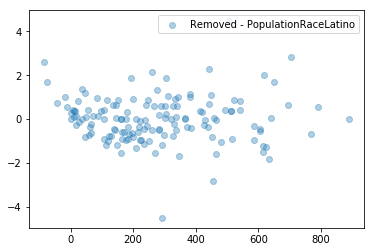

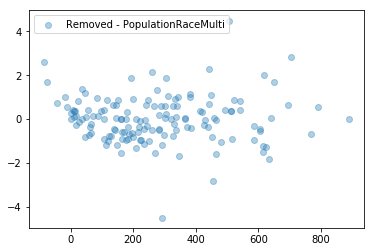

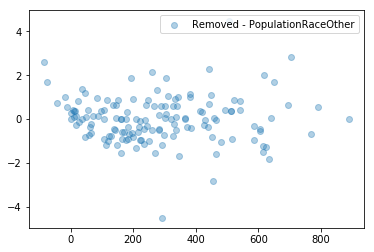

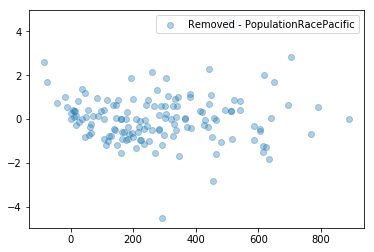

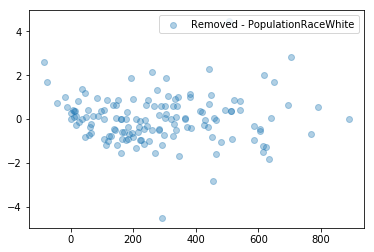

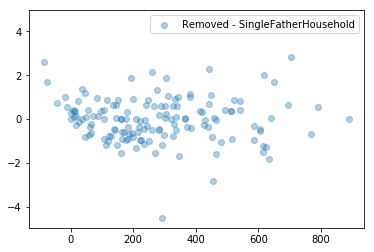

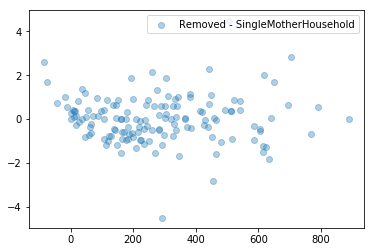

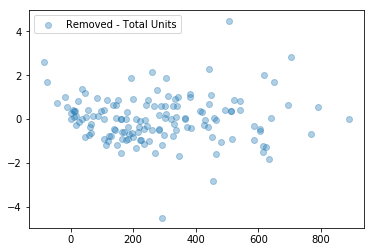

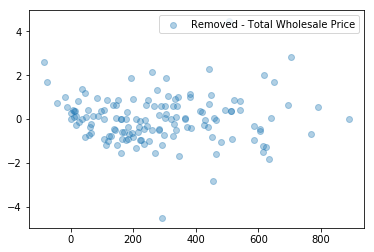

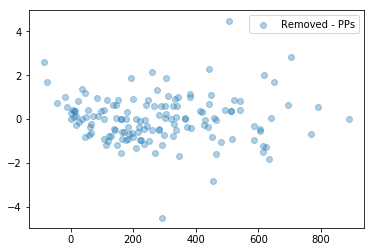

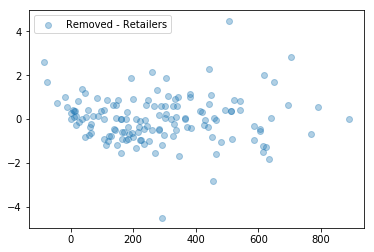

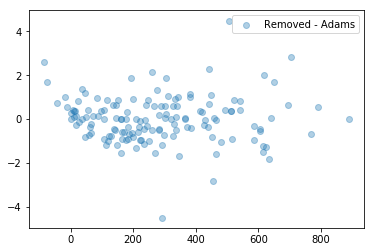

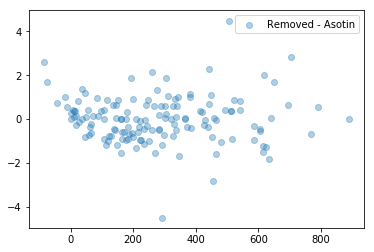

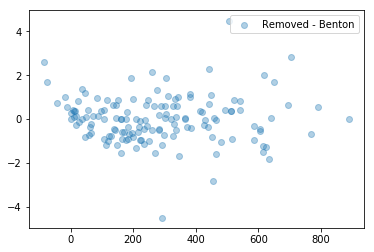

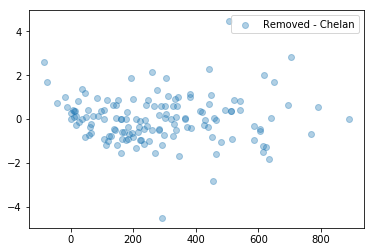

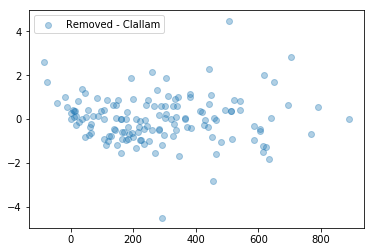

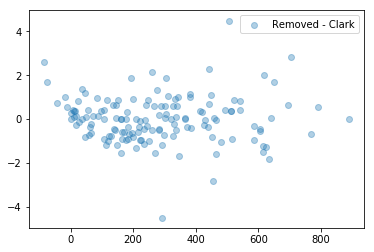

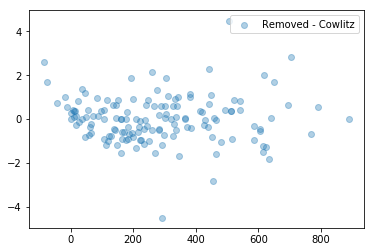

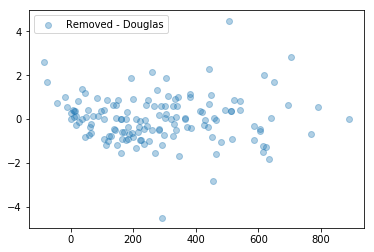

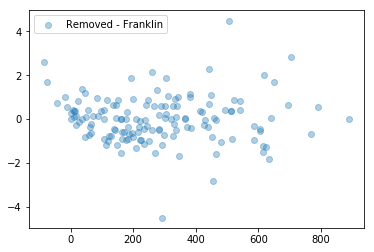

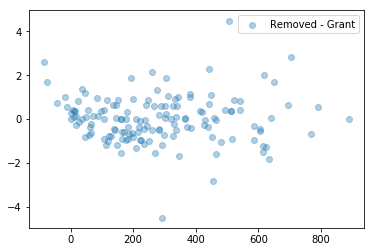

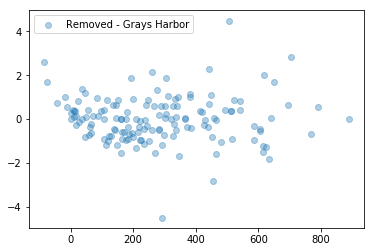

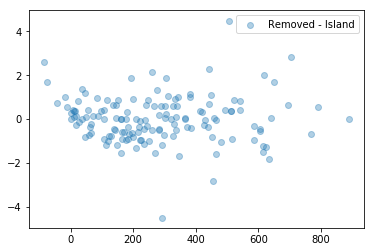

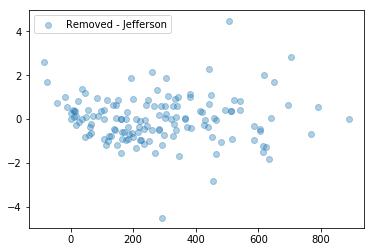

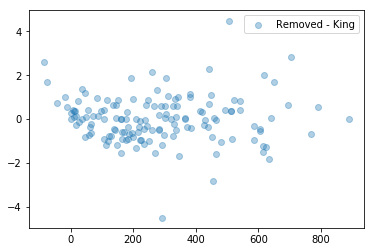

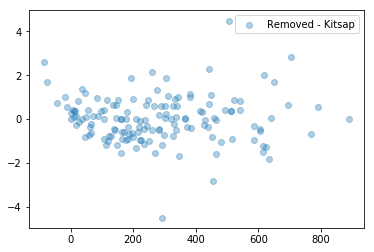

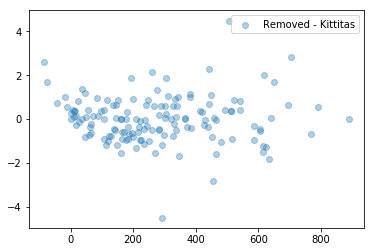

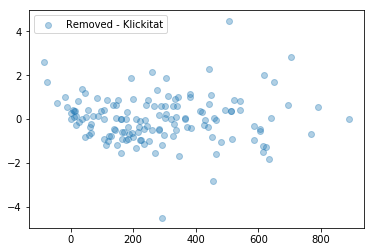

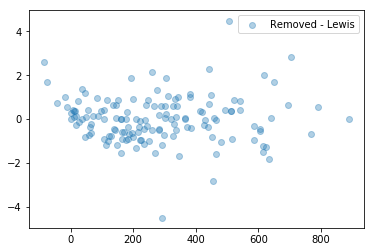

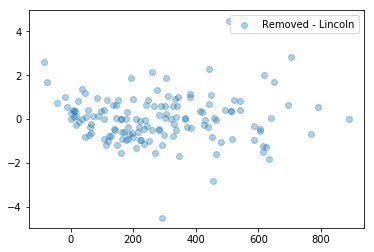

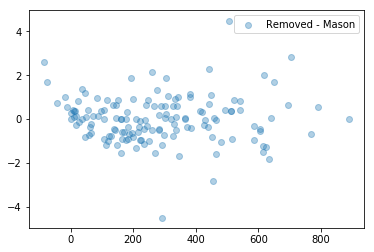

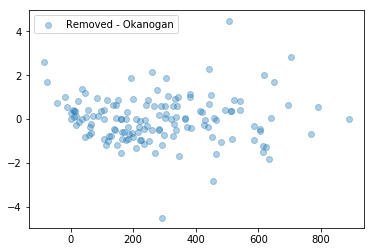

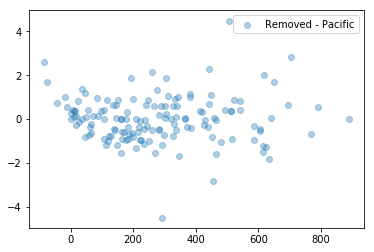

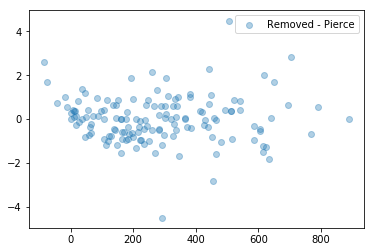

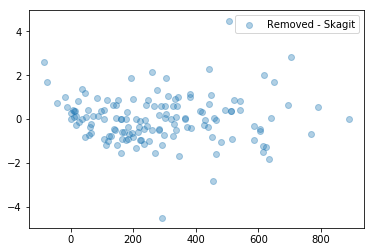

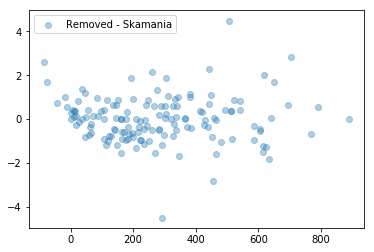

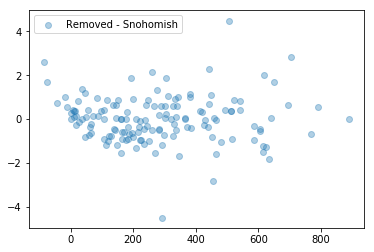

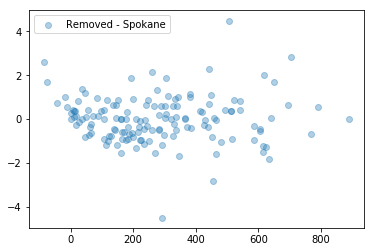

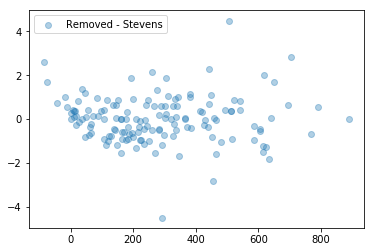

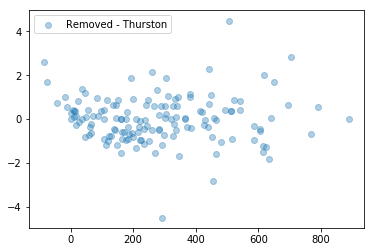

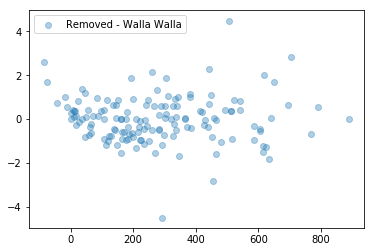

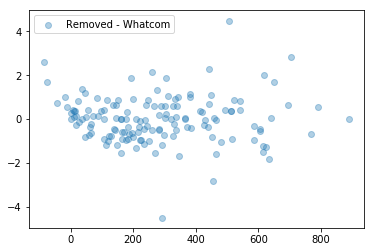

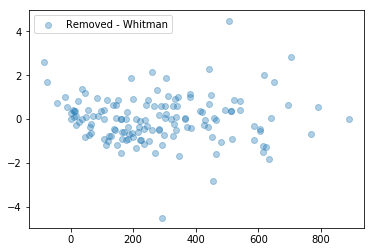

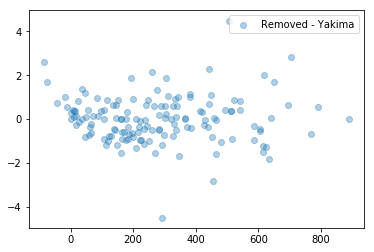

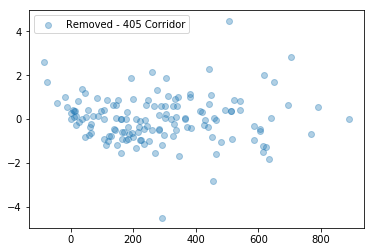

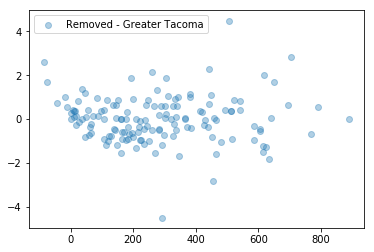

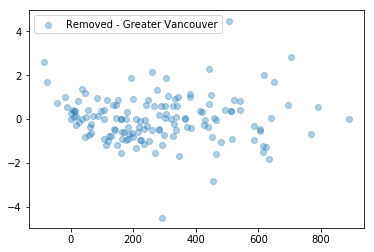

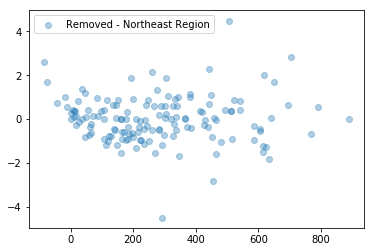

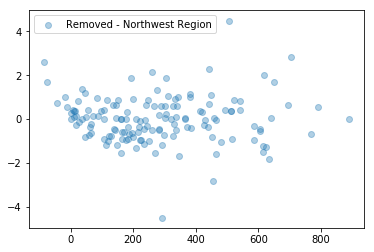

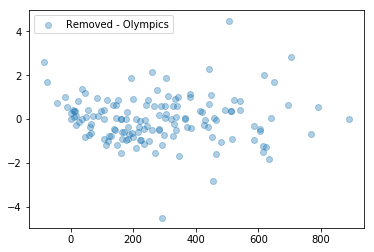

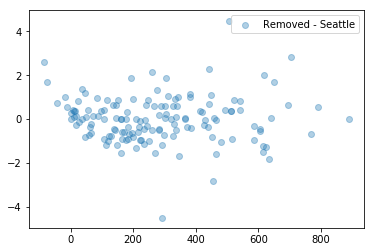

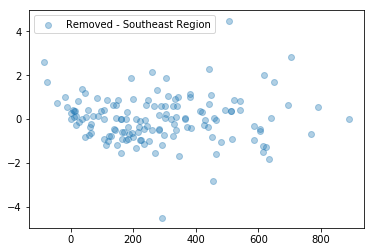

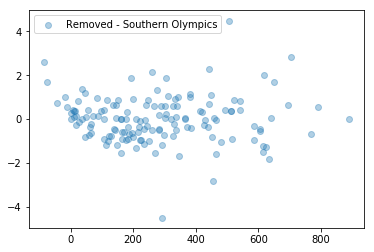

In [30]:
all_columns = df.columns
for col_name in all_columns:
    all_columns_copy = list(all_columns)
    all_columns_copy.remove(col_name)
    plot_model(X1, y1, 'Removed - ' + str(col_name))

In [31]:
df_full

,Zip,First city,First county,First Region,Avg Monthly Wholesales in period,Avg Monthly Retail Sales in Period 2,Population,Per Capita Retail Sales,Total Sales,MedianAge,HouseHolder15to24,HouseHolder25to34,HouseHolder35to44,HouseHolder45to54,HouseHolder55to59,HouseHolder60to64,HouseHolder65to74,HouseHolder75to84,Households,HouseHolder85over,Households2Person,Households3Person,Households4Person,Households5Person,Households6Person,Households7PlusPerson,HouseholdsWith60Plus,HouseholdsWith75Plus,HusbandWifeHouseholds,MedianAgeFemale,MedianAgeMale,NonFamilyHouseholds,PopulationAmerindian,PopulationFemale,PopulationMale,PopulationRaceAsian,PopulationRaceBlack,PopulationRaceLatino,PopulationRaceMulti,PopulationRaceOther,PopulationRacePacific,PopulationRaceWhite,SingleFatherHousehold,SingleMotherHousehold,Total Units,Total Wholesale Price,PPs,Retailers
0,nan,Burlington,NaN,405 Corridor,$17486,$22069.00,nan,NaN,$441380,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"53,464.00",$349720,101.00,1
1,"98,002.00",Auburn,King,Greater Tacoma,$393430,$645001.52,"31,647.00",$12.43,$23220055,34.80,653.00,"2,257.00","2,234.00","2,614.00","1,094.00",946.00,"1,311.00",864.00,"12,495.00",222.00,"6,842.00","2,679.00","1,550.00",765.00,352.00,301.00,"3,998.00","1,538.00","4,665.00",35.90,33.70,"5,058.00",0.02,"16,083.00","15,564.00",0.04,0.05,0.18,0.04,0.00,0.02,0.64,841.00,"1,931.00","2,145,809.00",$14163491,276.00,4
2,"98,003.00",Federal Way,King,Greater Tacoma,NaN,NaN,"44,151.00",NaN,NaN,34.70,"1,041.00","3,199.00","3,214.00","3,619.00","1,530.00","1,277.00","1,660.00",924.00,"17,250.00",332.00,"9,504.00","3,579.00","2,121.00","1,096.00",515.00,429.00,"5,285.00","1,969.00","6,863.00",36.50,32.80,"6,777.00",0.01,"22,808.00","21,343.00",0.13,0.10,0.18,0.05,0.00,0.03,0.50,"1,042.00","2,568.00",nan,NaN,nan,4
3,"98,004.00",Bellevue,King,405 Corridor,$391726,$604033.69,"27,946.00",$14.02,$22953280,39.60,771.00,"2,838.00","2,427.00","2,356.00",972.00,930.00,"1,327.00","1,124.00","13,320.00",416.00,"8,843.00","2,434.00","1,406.00",485.00,118.00,34.00,"4,228.00","1,835.00","5,946.00",41.40,37.70,"6,245.00",0.00,"14,052.00","13,894.00",0.21,0.02,0.04,0.03,0.00,0.00,0.69,352.00,777.00,"1,692,601.00",$14885594,146.00,3
4,"98,005.00",Bellevue,King,405 Corridor,$181822,$285412.32,"17,714.00",$10.26,$10274843,38.10,338.00,"1,596.00","1,381.00","1,517.00",657.00,564.00,800.00,556.00,"7,539.00",138.00,"4,439.00","1,595.00",992.00,333.00,115.00,64.00,"2,275.00",788.00,"3,800.00",39.90,36.20,"2,958.00",0.00,"8,784.00","8,930.00",0.26,0.02,0.07,0.03,0.00,0.00,0.61,248.00,533.00,"727,519.00",$6545592,173.00,5
5,"98,006.00",Bellevue,King,405 Corridor,$152588,$210124.58,"36,364.00",$4.20,$1260747,42.40,266.00,"1,239.00","2,521.00","3,775.00","1,513.00","1,255.00","1,548.00","1,178.00","13,288.00",252.00,"6,429.00","2,955.00","2,659.00",899.00,245.00,100.00,"4,534.00","1,423.00","8,877.00",43.50,41.20,"2,940.00",0.00,"18,369.00","17,995.00",0.30,0.02,0.03,0.04,0.00,0.00,0.60,429.00,"1,042.00","101,734.00",$915530,42.00,1
6,"98,007.00",Bellevue,King,405 Corridor,$99291,$149720.58,"24,889.00",$3.99,$1347485,32.00,674.00,"3,207.00","1,836.00","1,576.00",651.00,573.00,808.00,590.00,"10,315.00",208.00,"5,613.00","2,556.00","1,306.00",489.00,219.00,125.00,"2,663.00","1,118.00","4,802.00",33.20,31.20,"4,143.00",0.00,"12,063.00","12,826.00",0.36,0.03,0.13,0.03,0.00,0.00,0.44,414.00,956.00,"143,291.00",$893615,59.00,1
7,"98,012.00",Bothell,King,405 Corridor,$277734,$484280.09,"51,136.00",$5.43,$18886923,35.90,732.00,"3,725.00","4,440.00","4,440.00","1,875.00","1,445.00","1,557.00",810.00,"19,448.00",250.00,"9,699.00","4,541.00","3,329.00","1,215.00",455.00,207.00,"4,919.00","1,479.00","11,191.00",36.50,35.30,"5,756.00",0.00,"25,940.00","25,196.00",0.17,0.02,0.07,0.04,0.00,0.00,0.70,796.00,"1,705.00","1,427,817.00",$10831611,278.00,5
8,"98,020.00",Edmonds,Snohomish,Seattle,NaN,NaN,"18,304.00"